In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import csv
import os

In [4]:
%matplotlib inline

In [5]:
log_dicts = sorted(glob.glob('./py_search_*/'), key= lambda x:int(x.split('_')[-1].split('/')[0]))

In [6]:
def skip_last(iterator):
    prev = next(iterator)
    for item in iterator:
        yield prev
        prev = item

In [7]:
def read_to_dict(file_name):
    res_dict = {}
    keym = {}
    with open(file_name, newline='') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',')
        for i, row in enumerate(csv_reader):
            if i == 0:
                for j, rr in enumerate(row):
                    res_dict[rr] = []
                    keym[j] = rr
            else:
                for j, rr in enumerate(row):
                    res_dict[keym[j]].append(float(rr))
    return res_dict

In [8]:
def read_to_dict2(file_name):
    lines = open(file_name).read().split('\n')[1:-1]
    res = {'epoch':[], 'acc':[]}
    for i,ll in enumerate(lines):
        try:
            ep = int(ll.split(',')[0])
            aca = float(ll.split(',')[1])
        except:
            print(i)
            continue
        res['epoch'].append(ep)
        res['acc'].append(aca)
    return res

In [18]:
tip = {}

bs_ng = {6:[2,3], 12:[2, 3,4], 24:[2, 3,4]}
bs_lr = {6:[1e-5, 8e-5, 5e-4, 1e-4],
         12: [8e-5, 1e-4, 5e-4, 1e-3],
         24: [8e-5, 1e-4, 5e-4,1e-3]}
i = 0
for prob in ['py150']:
    for bs in [6, 12, 24]:
        for lr in bs_lr[bs]:
            for ng in bs_ng[bs]:
                tip['./py_search_{}/'.format(i)] = (bs,lr,ng)
                i+=1

In [19]:
colo = {}
for logd in tip:
    if (tip[logd][0], tip[logd][2]) not in colo:
        colo[(tip[logd][0], tip[logd][2])] = []
    colo[(tip[logd][0], tip[logd][2])].append(logd)

In [20]:
colo = {6:'r', 12:'g',24:'b'}

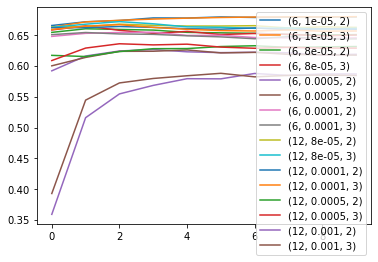

In [25]:
for logd in test_res_dict:
    #if tip[logd][1] not in [8e-5,1e-5]:
    #    continue
    if tip[logd][2] not in [2,3]:
        continue
    if tip[logd][0] in [24]:
        continue
    plt.plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['acc'], label="{}".format(tip[logd]))
plt.legend()
#plt.title('{}'.format(expe))

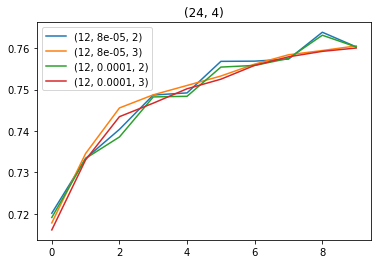

In [58]:
for logd in test_res_dict:
    if tip[logd][1] not in [8e-5, 1e-4,1e-5]:
        continue
    if tip[logd][2] not in [2,3]:
        continue
    if tip[logd][0] in [6,24]:
        continue
    plt.plot(in_test_res_dict[logd]['epoch'], in_test_res_dict[logd]['acc'], label="{}".format(tip[logd]))
plt.title('{}'.format(expe))
plt.legend()

In [13]:
train_res_dict = {}
val_res_dict = {}
test_res_dict = {}
in_test_res_dict = {}

for logd in log_dicts:
    keym = {}
    #print(logd)
    #train_res_dict[logd] = read_to_dict('{}train_algo.csv'.format(logd))
    #val_res_dict[logd] = read_to_dict('{}val_eval.csv'.format(logd))
    test_res_dict[logd] = read_to_dict('{}test_eval.csv'.format(logd))
    in_test_res_dict[logd] = read_to_dict('{}id_test_eval.csv'.format(logd))

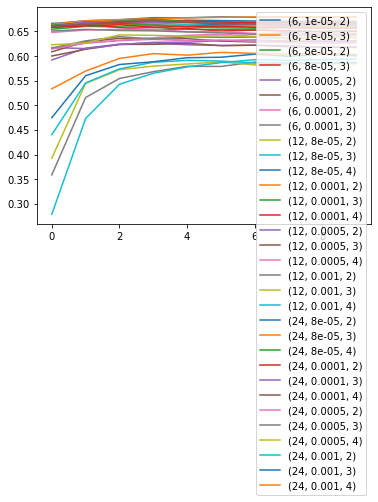

In [14]:
for logd in test_res_dict:
    plt.plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['acc'], label="{}".format(tip[logd]))
plt.legend()

In [44]:
params

{'./hpsearch_mol_50/': (32, 1e-05, 400),
 './hpsearch_mol_51/': (32, 0.0001, 400),
 './hpsearch_mol_52/': (32, 0.001, 400),
 './hpsearch_mol_53/': (32, 0.005, 400),
 './hpsearch_mol_54/': (32, 0.01, 400),
 './hpsearch_mol_55/': (32, 0.05, 400),
 './hpsearch_mol_56/': (64, 1e-05, 500),
 './hpsearch_mol_57/': (64, 0.0001, 500),
 './hpsearch_mol_58/': (64, 0.0005, 500),
 './hpsearch_mol_59/': (64, 0.001, 500),
 './hpsearch_mol_60/': (128, 1e-05, 600),
 './hpsearch_mol_61/': (128, 0.001, 600),
 './hpsearch_mol_62/': (128, 0.01, 600)}

./hpsearch_mol_50/
./hpsearch_mol_51/
./hpsearch_mol_52/
./hpsearch_mol_53/
./hpsearch_mol_54/
./hpsearch_mol_55/
./hpsearch_mol_56/
./hpsearch_mol_57/
./hpsearch_mol_58/
./hpsearch_mol_59/
./hpsearch_mol_60/
./hpsearch_mol_61/
./hpsearch_mol_62/


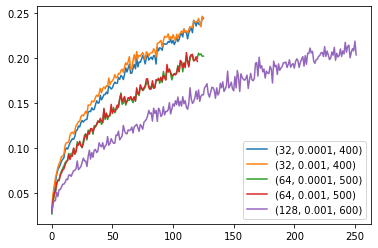

./py_search_0/
./py_search_1/
./py_search_2/
./py_search_3/
./py_search_4/
./py_search_5/
./py_search_6/
./py_search_7/
./py_search_8/
./py_search_9/
./py_search_10/
./py_search_11/
./py_search_12/
./py_search_13/
./py_search_14/
./py_search_15/
./py_search_16/
./py_search_17/
./py_search_18/
./py_search_19/
./py_search_20/
./py_search_21/
./py_search_22/
./py_search_23/
./py_search_24/
./py_search_25/
./py_search_26/
./py_search_27/
./py_search_28/
./py_search_29/
./py_search_30/
./py_search_31/


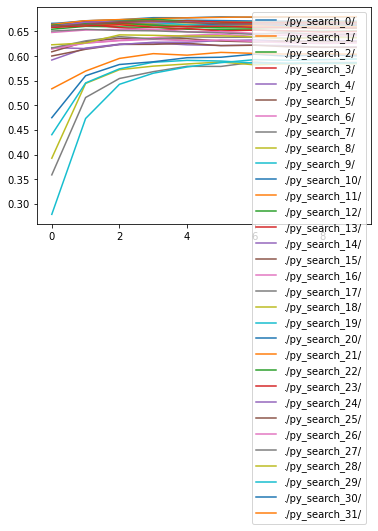

In [17]:
for logd in test_res_dict:
    print(logd)
    plt.plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['acc'], label="{}".format(logd))
plt.legend()

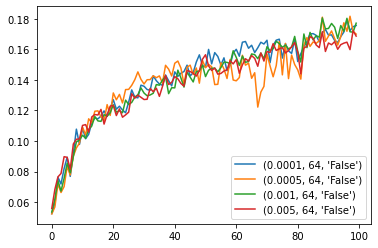

In [66]:
for i,logd in enumerate(train_res_dict):
    if i < 16:
        conf = tip[i]
    else:
        conf = tip[i+4]
    if conf[2] == 'True':
        continue
    if conf[1] in [32,128]:
        continue
    colo = ["r","g","b"][[32,64,128].index(conf[1])]
    plt.plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['ap'], label=conf)
plt.legend()

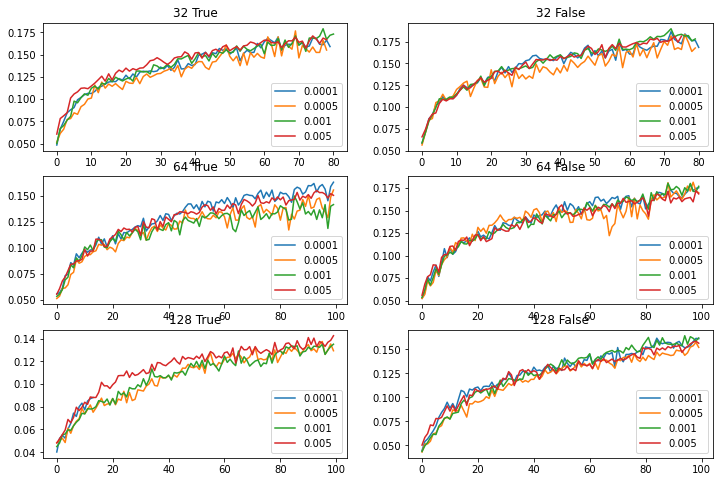

In [53]:
fig, axs = plt.subplots(3, 2, figsize=(12,8))
for i,logd in enumerate(train_res_dict):
    if i < 16:
        lr, bs, unif = tip[i]
    else:
        lr, bs, unif = tip[i+4]
    loc0 = [0.0001, 0.0005, 0.001, 0.005].index(lr)
    loc1 = [32,64,128].index(bs)
    loc2 = ["True", "False"].index(unif)
    axs[loc1,loc2].plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['ap'], label=lr)
for x in range(3):
    for y in range(2):
        xs = [0.0001, 0.0005, 0.001, 0.005][x]
        ys = [32,64,128][x]
        zs = ["True", "False"][y]
        axs[x,y].legend()
        axs[x,y].set_title("{} {}".format(ys,zs))

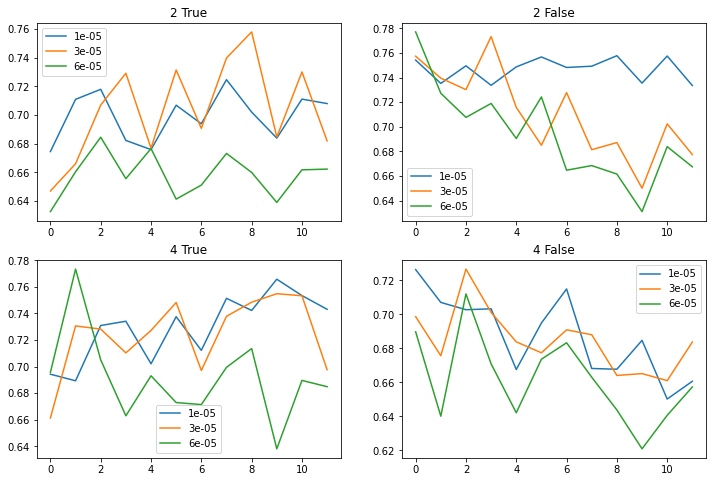

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    axs[loc1,loc2].plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['acc_avg'], label=tip[alg][0])
for x in range(2):
    for y in range(2):
        xs = [2, 4][x]
        ys = ["True", "False"][y]
        axs[x,y].legend()
        axs[x,y].set_title("{} {}".format(xs,ys))

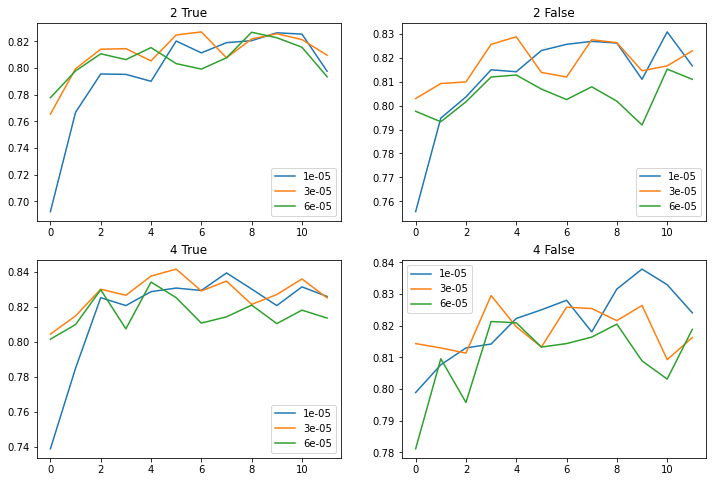

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    axs[loc1,loc2].plot(in_test_res_dict[logd]['epoch'], in_test_res_dict[logd]['acc_avg'], label=tip[alg][0])
for x in range(2):
    for y in range(2):
        xs = [2, 4][x]
        ys = ["True", "False"][y]
        axs[x,y].legend()
        axs[x,y].set_title("{} {}".format(xs,ys))

In [13]:
test_res_dict[logd].keys()

dict_keys(['epoch', 'acc_avg', 'recall-macro_all', 'F1-macro_all'])

In [1]:
fig, axs = plt.subplots(3, 2, figsize=(12,8))
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    axs[loc0,loc1].plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['F1-macro_all'], label=tip[alg][2])
for x in range(3):
    for y in range(2):
        xs = [1e-5, 3e-5, 6e-5][x]
        ys = [2,4][y]
        axs[x,y].legend()
        axs[x,y].set_title("{} {}".format(xs,ys))

NameError: name 'plt' is not defined

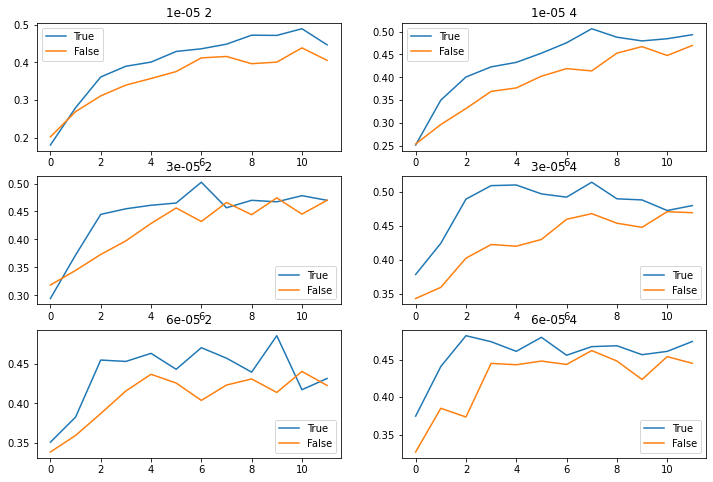

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(12,8))
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    axs[loc0,loc1].plot(in_test_res_dict[logd]['epoch'], in_test_res_dict[logd]['F1-macro_all'], label=tip[alg][2])
for x in range(3):
    for y in range(2):
        xs = [1e-5, 3e-5, 6e-5][x]
        ys = [2,4][y]
        axs[x,y].legend()
        axs[x,y].set_title("{} {}".format(xs,ys))

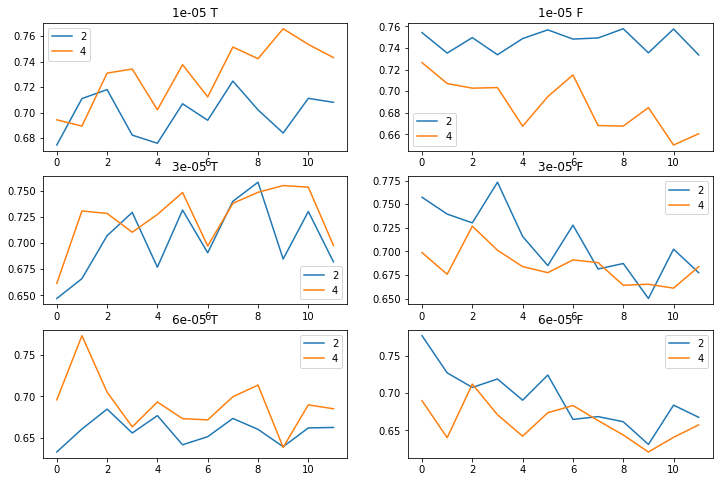

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(12,8))
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    axs[loc0,loc2].plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['acc_avg'], label=tip[alg][1])
for x in range(3):
    for y in range(2):
        xs = [1e-5, 3e-5, 6e-5][x]
        ys = ["T","F"][y]
        axs[x,y].legend()
        axs[x,y].set_title("{} {}".format(xs,ys))

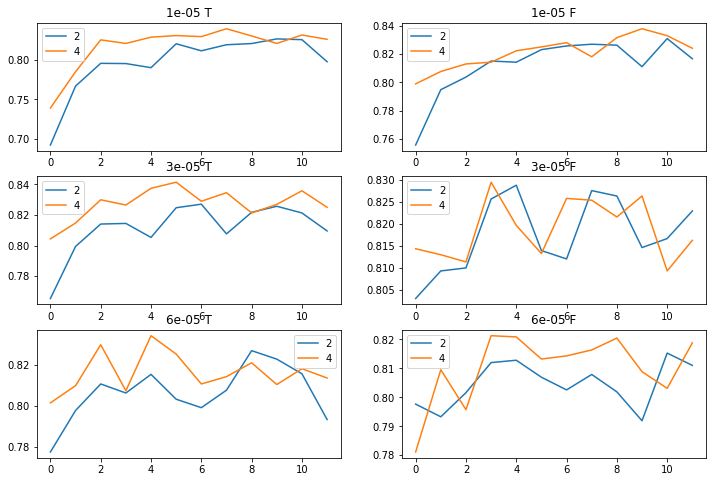

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(12,8))
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    axs[loc0,loc2].plot(in_test_res_dict[logd]['epoch'], in_test_res_dict[logd]['acc_avg'], label=tip[alg][1])
for x in range(3):
    for y in range(2):
        xs = [1e-5, 3e-5, 6e-5][x]
        ys = ["T", "F"][y]
        axs[x,y].legend()
        axs[x,y].set_title("{} {}".format(xs,ys))

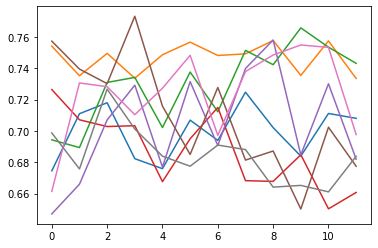

In [20]:
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    if loc0==2:
        continue
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    plt.plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['acc_avg'], label=str(tip[alg]))
#plt.legend()

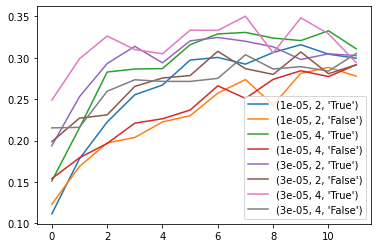

In [22]:
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    if loc0==2:
        continue
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    plt.plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['F1-macro_all'], label=str(tip[alg]))
plt.legend()

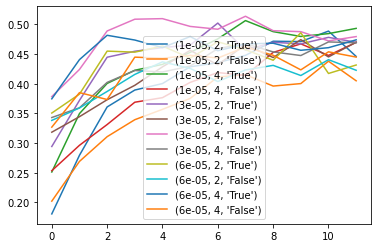

In [23]:
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    plt.plot(in_test_res_dict[logd]['epoch'], in_test_res_dict[logd]['F1-macro_all'], label=str(tip[alg]))
plt.legend()